# Pushpit Jain
## ASU ID - 1229623618

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

In [2]:
# Load the Titanic training data
training_dataset = pd.read_csv('./dataset/train.csv')
testing_dataset = pd.read_csv('./dataset/test.csv')
combined_dataset = [training_dataset, testing_dataset]

In [3]:
print("Before dropping least significant columns:", training_dataset.shape, testing_dataset.shape, combined_dataset[0].shape, combined_dataset[1].shape)

training_dataset = training_dataset.drop(['Ticket', 'Cabin'], axis=1)
testing_dataset = testing_dataset.drop(['Ticket', 'Cabin'], axis=1)
combined_dataset = [training_dataset, testing_dataset]

print("After dropping Ticket and Cabin columns:", training_dataset.shape, testing_dataset.shape, combined_dataset[0].shape, combined_dataset[1].shape)

Before dropping least significant columns: (891, 12) (418, 11) (891, 12) (418, 11)
After dropping Ticket and Cabin columns: (891, 10) (418, 9) (891, 10) (418, 9)


In [4]:
for dataset in combined_dataset:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(training_dataset['Title'], training_dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [5]:
for dataset in combined_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
training_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [6]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combined_dataset:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

training_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [7]:
training_dataset = training_dataset.drop(['Name', 'PassengerId'], axis=1)
testing_dataset = testing_dataset.drop(['Name'], axis=1)
combined_dataset = [training_dataset, testing_dataset]
training_dataset.shape, testing_dataset.shape

((891, 9), (418, 9))

In [8]:
training_dataset.dropna(subset=['Embarked'], inplace=True)

In [9]:
imputer = IterativeImputer()
training_dataset['Age'] = imputer.fit_transform(training_dataset[['Age']])
testing_dataset['Age'] = imputer.transform(testing_dataset[['Age']])
training_dataset['Fare'] = imputer.fit_transform(training_dataset[['Fare']])
testing_dataset['Fare'] = imputer.transform(testing_dataset[['Fare']])

In [10]:
OHEncoder = OneHotEncoder(drop='first', sparse=False)
for dataset in combined_dataset:
    encoded_features = OHEncoder.fit_transform(dataset[['Pclass','Sex', 'Embarked', 'Title']])
    dataset.drop(['Pclass','Sex', 'Embarked', 'Title'], axis=1, inplace=True)
    dataset[OHEncoder.get_feature_names_out(['Pclass','Sex', 'Embarked', 'Title'])] = encoded_features
training_dataset.head()

/Users/pushpitjain/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pushpitjain/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,Title_4,Title_5
0,0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
testing_dataset.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,Title_4,Title_5
0,892,34.5,0,0,7.8292,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,893,47.0,1,0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,894,62.0,0,0,9.6875,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,895,27.0,0,0,8.6625,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,896,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
training_dataset.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_2       0
Title_3       0
Title_4       0
Title_5       0
dtype: int64

In [13]:
testing_dataset.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_2        0
Title_3        0
Title_4        0
Title_5        0
dtype: int64

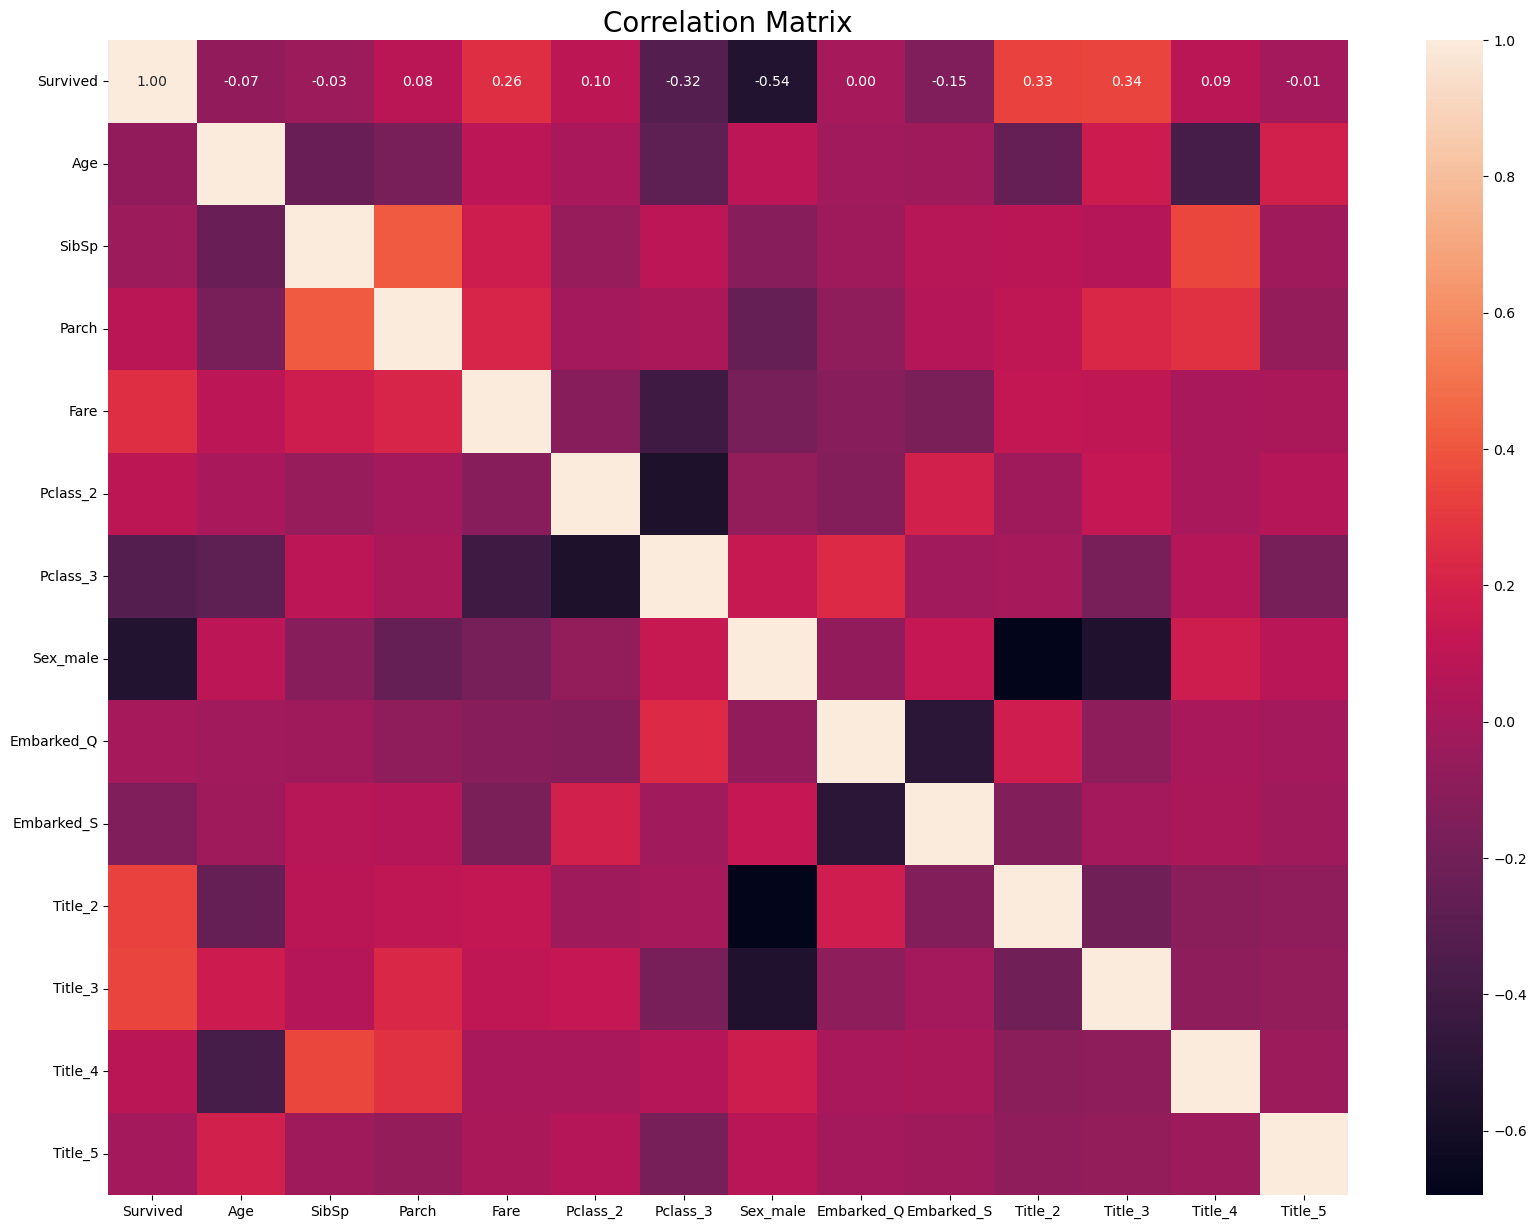

In [14]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(training_dataset.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [15]:
training_dataset['AgeBand'] = pd.cut(training_dataset['Age'], 10)
training_dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/var/folders/hl/j960mm8x5kscmgdml8mpcrlc0000gn/T/ipykernel_10782/2386572634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  training_dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 8.378]",0.666667
1,"(8.378, 16.336]",0.413043
2,"(16.336, 24.294]",0.355932
3,"(24.294, 32.252]",0.338150
4,"(32.252, 40.21]",0.435897
5,"(40.21, 48.168]",0.342857
6,"(48.168, 56.126]",0.466667
7,"(56.126, 64.084]",0.347826
8,"(64.084, 72.042]",0.000000
9,"(72.042, 80.0]",0.500000


In [16]:
for dataset in combined_dataset:    
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 11), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 16), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 21), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 26), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 32), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 37), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 42), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 48), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 53), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 53) & (dataset['Age'] <= 58), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 58) & (dataset['Age'] <= 64), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 69), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 69) & (dataset['Age'] <= 74), 'Age'] = 13
    dataset.loc[ dataset['Age'] > 74, 'Age'] = 14

training_dataset.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,Title_4,Title_5,AgeBand
0,0,4.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,"(16.336, 24.294]"
1,1,7.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"(32.252, 40.21]"
2,1,4.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,"(24.294, 32.252]"
3,1,6.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"(32.252, 40.21]"
4,0,6.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,"(32.252, 40.21]"


In [17]:
training_dataset = training_dataset.drop(['AgeBand'], axis=1)
combined_dataset = [training_dataset, testing_dataset]
training_dataset.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,Title_4,Title_5
0,0,4.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,7.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,4.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,6.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,6.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
for dataset in combined_dataset:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

training_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [19]:
for dataset in combined_dataset:    
    dataset.loc[ dataset['FamilySize'] <= 1, 'FamilyType'] = 0
    dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilyType'] = 1
    dataset.loc[(dataset['FamilySize'] > 4) & (dataset['FamilySize'] <= 7), 'FamilyType'] = 2
    dataset.loc[(dataset['FamilySize'] > 7) & (dataset['FamilySize'] <= 11), 'FamilyType'] = 3
    dataset['FamilyType'] = dataset['FamilyType'].astype(int)

combined_dataset = [training_dataset, testing_dataset]

training_dataset.head(10)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,Title_4,Title_5,FamilySize,FamilyType
0,0,4.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1
1,1,7.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
2,1,4.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
3,1,6.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,1
4,0,6.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
5,0,5.0,0,0,8.4583,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
6,0,10.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
7,0,0.0,3,1,21.0750,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5,2
8,1,5.0,0,2,11.1333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,1
9,1,2.0,1,0,30.0708,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1


In [20]:
encoder = OneHotEncoder(drop='first', sparse=False)
for dataset in combined_dataset:
    encoded_features = encoder.fit_transform(dataset[['FamilySize']])
    dataset.drop(['FamilySize'], axis=1, inplace=True)
    dataset[encoder.get_feature_names_out(['FamilySize'])] = encoded_features
training_dataset.head()

/Users/pushpitjain/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pushpitjain/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,...,Title_5,FamilyType,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,0,4.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,6.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
training_dataset = training_dataset.drop(['Parch', 'SibSp'], axis=1)
testing_dataset = testing_dataset.drop(['Parch', 'SibSp'], axis=1)
combined_dataset = [training_dataset, testing_dataset]

training_dataset.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,...,Title_5,FamilyType,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,0,4.0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4.0,7.9250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6.0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,6.0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for dataset in combined_dataset:
    dataset['Age*Class'] = dataset['Age'] * (1 + dataset['Pclass_2'] + 2 * dataset['Pclass_3'])

training_dataset.loc[:, ['Age*Class', 'Age', 'Pclass_2', 'Pclass_3']].head(10)

,Age*Class,Age,Pclass_2,Pclass_3
0,12.0,4.0,0.0,1.0
1,7.0,7.0,0.0,0.0
2,12.0,4.0,0.0,1.0
3,6.0,6.0,0.0,0.0
4,18.0,6.0,0.0,1.0
5,15.0,5.0,0.0,1.0
6,10.0,10.0,0.0,0.0
7,0.0,0.0,0.0,1.0
8,15.0,5.0,0.0,1.0
9,4.0,2.0,1.0,0.0


In [23]:
training_dataset['FareBand'] = pd.qcut(training_dataset['Fare'], 4)
training_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/hl/j960mm8x5kscmgdml8mpcrlc0000gn/T/ipykernel_10782/1577797724.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  training_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [24]:
for dataset in combined_dataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


training_dataset = training_dataset.drop(['FareBand'], axis=1)
combined_dataset = [training_dataset, testing_dataset]

training_dataset.head(10)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,...,FamilyType,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Age*Class
0,0,4.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1,1,7.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,1,4.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
3,1,6.0,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0,6.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
5,0,5.0,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
6,0,10.0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
7,0,0.0,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,5.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
9,1,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [25]:
testing_dataset.head(10)

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,...,FamilyType,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Age*Class
0,892,6.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
1,893,8.0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2,894,11.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,895,5.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
4,896,4.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
5,897,2.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
6,898,5.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
7,899,4.0,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
8,900,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
9,901,3.0,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [26]:
training_dataset.corr()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_2,Title_3,...,FamilyType,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Age*Class
Survived,1.000000,-0.071198,0.293182,0.095002,-0.320171,-0.541585,0.004536,-0.151777,0.334953,0.340870,...,0.086235,0.164834,0.145177,0.129108,-0.049183,-0.080662,-0.011823,-0.064871,-0.070108,-0.307677
Age,-0.071198,1.000000,0.066894,0.017097,-0.284278,0.085407,-0.017400,-0.024450,-0.250695,0.164421,...,-0.216546,0.059161,-0.089692,-0.149112,-0.068962,-0.137513,-0.128504,-0.090557,-0.000778,0.615686
Fare,0.293182,0.066894,1.000000,0.039016,-0.541621,-0.245864,-0.242241,-0.024998,0.058910,0.258779,...,0.553777,0.304065,0.204931,0.155684,0.105402,0.135945,0.139512,0.110619,0.119550,-0.447875
Pclass_2,0.095002,0.017097,0.039016,1.000000,-0.567432,-0.066459,-0.127705,0.190824,-0.021130,0.120833,...,-0.028184,0.004882,0.086148,0.109373,-0.045370,-0.063508,-0.059759,-0.042112,-0.045512,-0.062011
Pclass_3,-0.320171,-0.284278,-0.541621,-0.567432,1.000000,0.134227,0.237035,-0.013594,0.002098,-0.175953,...,-0.009937,-0.187508,-0.066261,-0.089354,0.065257,0.070611,0.105315,0.074216,0.080208,0.418361
Sex_male,-0.541585,0.085407,-0.245864,-0.066459,0.134227,1.000000,-0.075217,0.121405,-0.694744,-0.550071,...,-0.265739,-0.186639,-0.097635,-0.117049,-0.123258,-0.004232,-0.077378,0.003044,-0.014488,0.165087
Embarked_Q,0.004536,-0.017400,-0.242241,-0.127705,0.237035,-0.075217,1.000000,-0.499261,0.168434,-0.090045,...,-0.072668,-0.051352,-0.035570,-0.056548,-0.040342,0.079661,-0.036021,-0.025384,-0.027434,0.159271
Embarked_S,-0.151777,-0.024450,-0.024998,0.190824,-0.013594,0.121405,-0.499261,1.000000,-0.138519,-0.003992,...,0.030960,-0.102177,-0.007029,0.014060,0.041710,0.017226,0.072149,0.050843,0.054948,0.052389
Title_2,0.334953,-0.250695,0.058910,-0.021130,0.002098,-0.694744,0.168434,-0.138519,1.000000,-0.206644,...,0.083858,-0.045586,0.007742,0.062484,0.127089,-0.009891,0.084605,-0.008201,0.048728,-0.233771
Title_3,0.340870,0.164421,0.258779,0.120833,-0.175953,-0.550071,-0.090045,-0.003992,-0.206644,1.000000,...,0.269286,0.305543,0.128523,0.089666,0.022383,0.018885,0.008769,0.006180,-0.036035,0.051093


In [27]:
X_train = training_dataset.drop("Survived", axis=1)
Y_train = training_dataset["Survived"]
X_test  = testing_dataset.drop("PassengerId", axis=1).copy()
Y_test = testing_dataset["PassengerId"]
X_train.shape, Y_train.shape, X_test.shape



((889, 21), (889,), (418, 21))

In [ ]:
DT = DecisionTreeClassifier()
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'criterion': ['gini', 'entropy']}

gridSearch = GridSearchCV(estimator = DT, param_grid = parameters, cv = 5, scoring = 'accuracy')

gridSearch.fit(X_train, Y_train)
print("The best parameters for the best score are: ", gridSearch.best_params_)
print("The best score for Decision Tree is: ", gridSearch.best_score_)

finalDT = gridSearch.best_estimator_
prediction = finalDT.predict(X_test)

In [ ]:
RF = RandomForestClassifier()
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'max_features': ['sqrt', 'log2', None],
              'bootstrap': [True, False]}

finalRF = RandomizedSearchCV(estimator = RF, param_distributions = parameters, cv = 5)
finalRF.fit(X_train, Y_train)
print("The best parameters for the best score are: ", finalRF.best_params_)
print("The best score for Random Forest is: ", finalRF.best_score_)

In [ ]:
plt.figure(figsize=(300, 150))
feature_names = list(X_train.columns)
plot_tree(finalDT, feature_names=feature_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
# Fine-tuned DT
scores = cross_val_score(finalDT, X_train, Y_train, cv=5)

print("Average Classification Accuracy (Decision Tree):", np.mean(scores))

In [ ]:
# Fine-tuned RF
scores = cross_val_score(finalRF, X_train, Y_train, cv=5)

print("Average Classification Accuracy (Random Forest):", np.mean(scores))

## Asnwer 5:
### After implementing both models, I concluded that the Random Forest algorithm outperforms them for the following reasons:
1. Random Forest has a greater average classification accuracy than the Decision Tree.
2. Decision Trees are more likely to overfit than Random Forests.
3. Random Forests are more scalable than Decision Trees because each tree in the forest can be taught simultaneously, resulting in a speedier training process. In contrast, Decision Trees must be trained sequentially, which can be time-consuming with huge datasets.